In [228]:
%matplotlib inline
from scipy.io import wavfile 
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft , ifft

In [229]:
fs, data = wavfile.read('1.wav') # 音频数据导入
audioData = [(ele/2**16.)*2 for ele in data]
lengthAudio = len(audioData)
alpha = 0.97

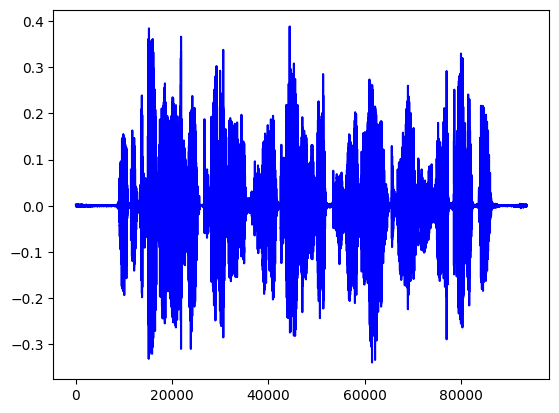

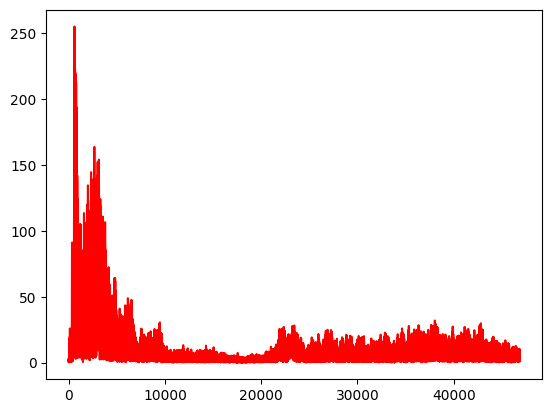

In [230]:
audioDataFFT = fft(audioData)
plt.plot(audioData,'b')
plt.show()
plt.plot(abs(audioDataFFT[:int(lengthAudio/2-1)]),'r')
plt.show()

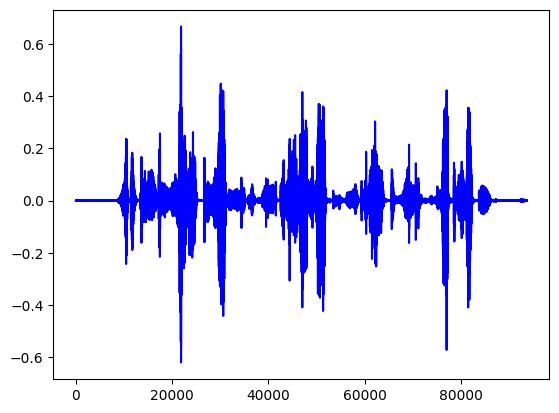

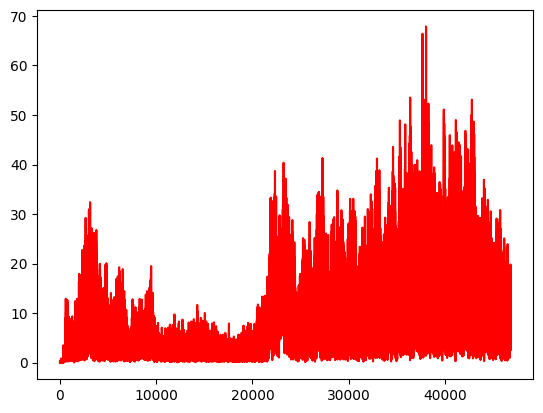

In [231]:
dataPreEmphasis = [audioData[ii]-alpha * audioData[ii-1] for ii in range(1,lengthAudio)]
dataPreEmphasisFFT = fft(dataPreEmphasis)
plt.plot(dataPreEmphasis,'b')
plt.show()
plt.plot(abs(dataPreEmphasisFFT[:int(lengthAudio/2-1)]),'r')
plt.show()

In [232]:
# Framing 成帧
audioList = list()
frameLen = int(fs*0.025) # 帧长为 25ms
for ii in range(lengthAudio//frameLen):
    audioList.append(dataPreEmphasis[ii*frameLen:(ii+1)*frameLen])


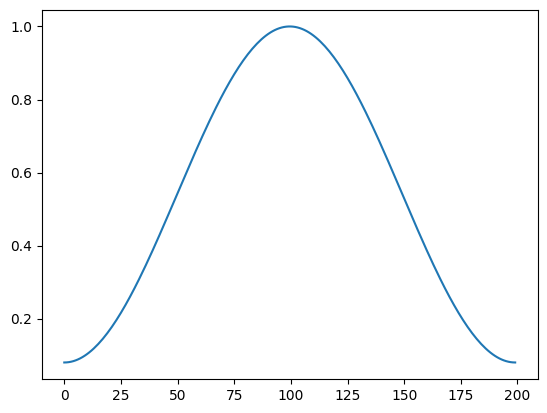

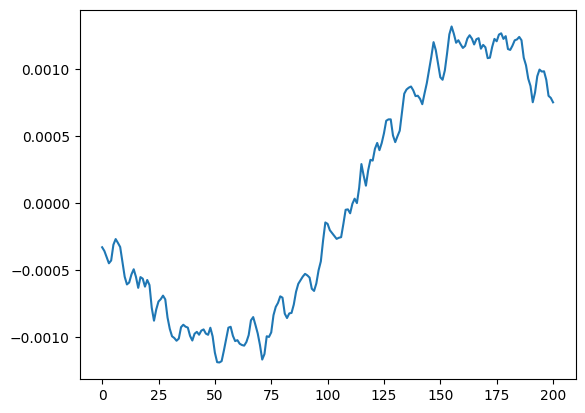

In [233]:
# Window 加窗
# PROBLEM 窗长为 N ，卷积用什么？valid ,same, full
N = 200 # 汉明幢大小
w = [0.54 - 0.46 * np.cos(2*np.pi*ii/(N-1)) for ii in range(N)]
plt.plot(w)
plt.show()
dataWindowed = [np.convolve(w,audioList[ii],'valid') for ii in range(len(audioList))]
plt.plot(dataWindowed[0])
plt.show()

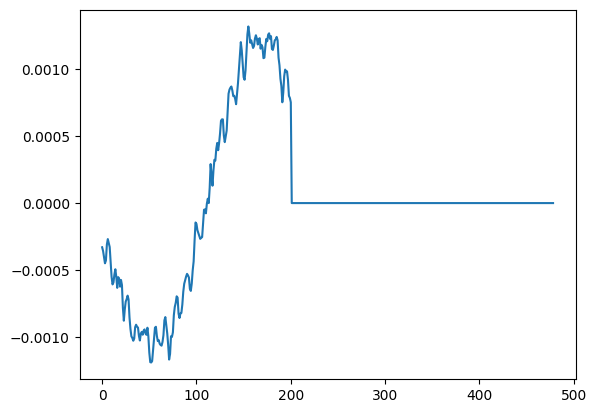

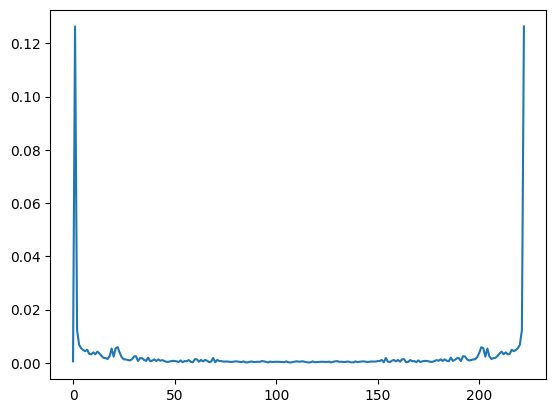

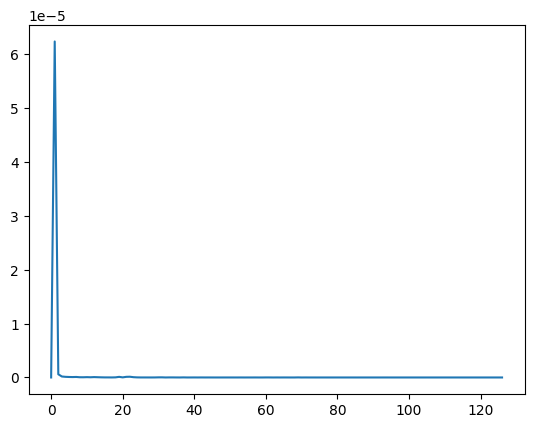

In [234]:
# Fourier-Transform and Power Spectrum
dataPad256 = np.pad(dataWindowed,(0,256-len(dataWindowed)),'constant')
dataPad512 = np.pad(dataWindowed,(0,512-len(dataWindowed)),'constant')
plt.plot(dataPad512[0])
plt.show()
dataFFT256 = fft(dataPad256)
dataFFT512 = fft(dataPad512)
PowerFFT256 = np.power(abs(dataFFT256),2)/256
PowerFFT512 = np.power(abs(dataFFT512),2)/512
PowerFFT256 = PowerFFT256[:,:127]
PowerFFT512 = PowerFFT256[:,:255]
plt.plot(abs(dataFFT256[0]))
plt.show()
plt.plot(PowerFFT256[0][:127])
plt.show()

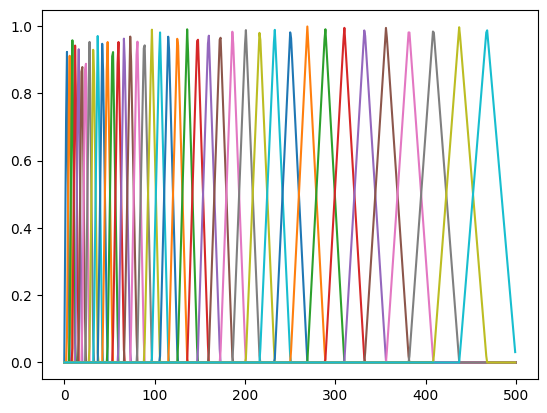

In [241]:
# Filter Bank
MMax = 2595 * np.log10(1+fs/1400)
MelStep = MMax/41
MelFrequenceList = [700*(10**(ii*MelStep/2595)-1) for ii in range(42)]
MelFilterList = list()
MelFilterN = 500
fStep = fs/2/MelFilterN
for ii in range(40):
    filter = list()
    for fn in range(MelFilterN):
        if fStep * fn < MelFrequenceList[ii] or fStep * fn > MelFrequenceList[ii+2]:
            filter.append(0)
        elif fStep * fn < MelFrequenceList[ii+1]:
            filter.append((fStep * fn - MelFrequenceList[ii])/(MelFrequenceList[ii+1] - MelFrequenceList[ii]))
        else:
            filter.append((- fStep * fn + MelFrequenceList[ii+2])/(MelFrequenceList[ii+2] - MelFrequenceList[ii+1]))
    MelFilterList.append(filter)

[plt.plot(MelFilterList[ii]) for ii in range(40)]
plt.show()
